<a href="https://colab.research.google.com/github/SanghunOh/study_machinglearning/blob/main/codes/yanginsuk/Colab_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
import numpy as np
import keras
import time
import os
import pandas as pd
import cv2
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.python.keras.models import load_model
#from keras.utils import to_categorical

In [ ]:
train_feature = pd.read_csv('/content/gdrive/My Drive/MyColab/Data/MPIE/Traindata.csv', dtype=np.float32, header=None) # image features of train data
train_label_csv = pd.read_csv('/content/gdrive/My Drive/MyColab/Data/MPIE/Trainlabel.csv', dtype=np.float32, header=None) # labels of train data
num_train = train_label_csv.shape[0] # number of train data
train_label = train_label_csv[1][0:num_train] # get label you want
train_label = np.array(to_categorical(train_label)) # convert '1-dimensional int type label' to 'one-hot vector'
test_feature = pd.read_csv('/content/gdrive/My Drive/MyColab/Data/MPIE/Testdata.csv', dtype=np.float32, header=None) # image feature of test data
test_label_csv = pd.read_csv('/content/gdrive/My Drive/MyColab/Data/MPIE/Testlabel.csv', dtype=np.float32, header=None) # labels of test data
num_test = test_label_csv.shape[0] # number of test data
test_label = test_label_csv[1][0:num_test] # get label you want
test_label = np.array(to_categorical(test_label)) # convert '1-dimensional int type label' to 'one-hot vector'
test_label


In [ ]:
## Load dataset
def MPIE_DATA():
    # train
    train_feature = pd.read_csv('/content/gdrive/My Drive/MyColab/Data/MPIE/Traindata.csv', dtype=np.float32, header=None) # image features of train data
    train_label_csv = pd.read_csv('/content/gdrive/My Drive/MyColab/Data/MPIE/Trainlabel.csv', dtype=np.float32, header=None) # labels of train data
    num_train = train_label_csv.shape[0] # number of train data
    train_label = train_label_csv[0][0:num_train] # get label you want
    train_label = np.array(to_categorical(train_label)) # convert '1-dimensional int type label' to 'one-hot vector'
    
    # test
    test_feature = pd.read_csv('/content/gdrive/My Drive/MyColab/Data/MPIE/Testdata.csv', dtype=np.float32, header=None) # image feature of test data
    test_label_csv = pd.read_csv('/content/gdrive/My Drive/MyColab/Data/MPIE/Testlabel.csv', dtype=np.float32, header=None) # labels of test data
    num_test = test_label_csv.shape[0] # number of test data
    test_label = test_label_csv[0][0:num_test] # get label you want
    test_label = np.array(to_categorical(test_label)) # convert '1-dimensional int type label' to 'one-hot vector'
    return train_feature, train_label, test_feature, test_label

In [ ]:
## Load dataset
def MPIE_DATA_CLASS(class_no):
    # train
    train_feature = pd.read_csv('/content/gdrive/My Drive/MyColab/Data/MPIE/Traindata.csv', dtype=np.float32, header=None) # image features of train data
    train_label_csv = pd.read_csv('/content/gdrive/My Drive/MyColab/Data/MPIE/Trainlabel.csv', dtype=np.float32, header=None) # labels of train data
    num_train = train_label_csv.shape[0] # number of train data
    train_label = train_label_csv[class_no][0:num_train] # get label you want
    train_label = np.array(to_categorical(train_label)) # convert '1-dimensional int type label' to 'one-hot vector'
    
    # test
    test_feature = pd.read_csv('/content/gdrive/My Drive/MyColab/Data/MPIE/Testdata.csv', dtype=np.float32, header=None) # image feature of test data
    test_label_csv = pd.read_csv('/content/gdrive/My Drive/MyColab/Data/MPIE/Testlabel.csv', dtype=np.float32, header=None) # labels of test data
    num_test = test_label_csv.shape[0] # number of test data
    test_label = test_label_csv[class_no][0:num_test] # get label you want
    test_label = np.array(to_categorical(test_label)) # convert '1-dimensional int type label' to 'one-hot vector'
    return train_feature, train_label, test_feature, test_label

In [ ]:
# Define MLP
def MPIE_MLP_CLASS(class_cnt):
    x = keras.layers.Input(shape=(1024,))  # input: 1024 nodes
    h = keras.layers.Activation('relu')(keras.layers.Dense(256)(x))  # hidden: 256 nodes
    #h = keras.layers.Activation('relu')(keras.layers.Dense(256)(h))  # hidden: 256 nodes
    #h = keras.layers.Activation('relu')(keras.layers.Dense(256)(h))  # hidden: 256 nodes
    y = keras.layers.Activation('softmax')(keras.layers.Dense(class_cnt)(h))    # number of output nodes : class_no (it changes depend on label you selected)
    model = keras.Model(x, y)
    model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
    return model

In [ ]:
# Define MLP
def MPIE_MLP():
    x = keras.layers.Input(shape=(1024,))  # input: 1024 nodes
    h = keras.layers.Activation('relu')(keras.layers.Dense(256)(x))  # hidden: 256 nodes
    #h = keras.layers.Activation('relu')(keras.layers.Dense(256)(h))  # hidden: 256 nodes
    #h = keras.layers.Activation('relu')(keras.layers.Dense(256)(h))  # hidden: 256 nodes
    y = keras.layers.Activation('softmax')(keras.layers.Dense(30)(h))    # number of output nodes : 30 (it changes depend on label you selected)
    model = keras.Model(x, y)
    model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
    return model

In [ ]:
# Define MLP
def MPIE_5MLP_CLASS(class_cnt):
    model = Sequential() 
    # Dense(256)의 의미는 256개의 hidden unit을 가지는 fully connected layer 
    # keras에서는 첫 번째 Layer, 즉 input layer의 input dimension만 지정하면 
    # 뒤의 연결되는 Layer의 dimension은 간단하게 작성 가능하다. 
    # width * height = 1024인 dimension 
    # glorot_uniform == Xavier Initialization, keras에서는 내부적으로 이미 제공 
    # 그 외 he_uniform 등도 이미 구현되어있다. 

    # 첫 번째 Layer (Input layer) 
    model.add(Dense(256, input_dim=1024, kernel_initializer='glorot_uniform', activation='relu')) 
    #model.add(Dropout(0.3)) # 30% 정도를 Drop 

    # 두 번째 Layer (Hidden layer 1) 
    # 두 번째 Layer부터는 output_dim만 설정하면 된다 
    # input_dim은 이전 레이어의 output_dim과 같다고 가정함 
    model.add(Dense(256, kernel_initializer='glorot_uniform', activation='relu')) 
    #model.add(Dropout(0.3)) 
    
    # 세 번째 Layer (Hidden layer 2) 
    model.add(Dense(256, kernel_initializer='glorot_uniform', activation='relu')) 
    #model.add(Dropout(0.3)) 
    
    # 네 번째 Layer (Hidden layer 3) 
    #model.add(Dense(256, kernel_initializer='glorot_uniform', activation='relu')) 
    #model.add(Dropout(0.3)) 
    
    # 다섯 번째 Layer (Output layer) 
    # Output layer는 softmax activation function 
    number_of_class = class_cnt     # MPIE이미지는 class_cnt가지의 Category를 가지고 있다. 
    model.add(Dense(number_of_class, activation='softmax')) 

    # Cost function 및 Optimizer 설정 
    # Multiclass 분류이므로 Cross-entropy 사용 
    # Adam optimizer 사용 
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
# Define MLP
def MPIE_5MLP():
    model = Sequential() 
    # Dense(256)의 의미는 256개의 hidden unit을 가지는 fully connected layer 
    # keras에서는 첫 번째 Layer, 즉 input layer의 input dimension만 지정하면 
    # 뒤의 연결되는 Layer의 dimension은 간단하게 작성 가능하다. 
    # width * height = 1024인 dimension 
    # glorot_uniform == Xavier Initialization, keras에서는 내부적으로 이미 제공 
    # 그 외 he_uniform 등도 이미 구현되어있다. 

    # 첫 번째 Layer (Input layer) 
    model.add(Dense(256, input_dim=1024, kernel_initializer='glorot_uniform', activation='relu')) 
    #model.add(Dropout(0.3)) # 30% 정도를 Drop 

    # 두 번째 Layer (Hidden layer 1) 
    # 두 번째 Layer부터는 output_dim만 설정하면 된다 
    # input_dim은 이전 레이어의 output_dim과 같다고 가정함 
    model.add(Dense(256, kernel_initializer='glorot_uniform', activation='relu')) 
    #model.add(Dropout(0.3)) 
    
    # 세 번째 Layer (Hidden layer 2) 
    model.add(Dense(256, kernel_initializer='glorot_uniform', activation='relu')) 
    #model.add(Dropout(0.3)) 
    
    # 네 번째 Layer (Hidden layer 3) 
    #model.add(Dense(256, kernel_initializer='glorot_uniform', activation='relu')) 
    #model.add(Dropout(0.3)) 
    
    # 다섯 번째 Layer (Output layer) 
    # Output layer는 softmax activation function 
    number_of_class = 30     # MPIE이미지는 30가지의 Category를 가지고 있다. 
    model.add(Dense(number_of_class, activation='softmax')) 

    # Cost function 및 Optimizer 설정 
    # Multiclass 분류이므로 Cross-entropy 사용 
    # Adam optimizer 사용 
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
# 5. 학습 과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt
def Display(hist):
  fig, loss_ax = plt.subplots()

  acc_ax = loss_ax.twinx()

  loss_ax.plot(hist.history['loss'],'y',label='train loss')
  loss_ax.plot(hist.history['val_loss'],'r',label='val loss')
  acc_ax.plot(hist.history['accuracy'],'b',label='train acc')
  acc_ax.plot(hist.history['val_accuracy'],'g',label='val acc')

  loss_ax.set_xlabel('epoch')
  loss_ax.set_ylabel('loss')
  acc_ax.set_ylabel('accuracy')

  loss_ax.legend(loc='upper left')
  acc_ax.legend(loc='lower left')
  plt.show()
  return
# 6. 모델 평가하기
#loss_and_metrics = model.evaluate(x_test,y_test,batch_size=32)

#print('##### Test Result #####')
#print('loss : ',str(loss_and_metrics[0]))
#print('Accuracy : ',str(loss_and_metrics[1]))

# 7. 모델 저장하기
#from tensorflow.python.keras.models import load_model
#model.save('mnist_mlp_model.h5')

In [ ]:
def Evaluate (model, x_test,y_test,batchSize):
  loss_and_metrics = model.evaluate(x_test,y_test,batch_size=batchSize)
  print('##### Test Result #####')
  print('loss : ',str(loss_and_metrics[0]))
  print('Accuracy : ',str(loss_and_metrics[1]))


In [ ]:
# Train and Test    
def main():
    #model = MPIE_MLP()  # create model object
    #train_feature, train_label, test_feature, test_label = MPIE_DATA()
    # class array[1] 분석
    class_cnt=1
    train_feature, train_label, test_feature, test_label = MPIE_DATA_CLASS(class_cnt)
    print(train_feature.shape)
    print(train_label.shape[1])
    print(test_feature.shape)
    print(test_label.shape)
    model = MPIE_MLP_CLASS(train_label.shape[1])  # create model object
    history = model.fit(train_feature, train_label, epochs=10, batch_size=8, validation_data=(test_feature, test_label), shuffle=True)    # train
    Display(history)
    Evaluate(model,test_feature, test_label,32 )
    
    model = MPIE_5MLP_CLASS(train_label.shape[1])  # create model object
    history = model.fit(train_feature, train_label, epochs=10, batch_size=8, validation_data=(test_feature, test_label), shuffle=True)    # train
    Display(history)
    Evaluate(model,test_feature, test_label,32 )

    # class array[2] 분석
    class_cnt=2
    train_feature, train_label, test_feature, test_label = MPIE_DATA_CLASS(class_cnt)
    print(train_feature.shape)
    print(train_label.shape[1])
    print(test_feature.shape)
    print(test_label.shape)
    model = MPIE_MLP_CLASS(train_label.shape[1])  # create model object
    history = model.fit(train_feature, train_label, epochs=10, batch_size=8, validation_data=(test_feature, test_label), shuffle=True)    # train
    Display(history)
    Evaluate(model,test_feature, test_label,32 )
    
    model = MPIE_5MLP_CLASS(train_label.shape[1])  # create model object
    history = model.fit(train_feature, train_label, epochs=10, batch_size=8, validation_data=(test_feature, test_label), shuffle=True)    # train
    Display(history)
    Evaluate(model,test_feature, test_label,32 )
    
    # class array[3] 분석
    class_cnt=3
    train_feature, train_label, test_feature, test_label = MPIE_DATA_CLASS(class_cnt)
    print(train_feature.shape)
    print(train_label.shape[1])
    print(test_feature.shape)
    print(test_label.shape)
    model = MPIE_MLP_CLASS(train_label.shape[1])  # create model object
    history = model.fit(train_feature, train_label, epochs=10, batch_size=8, validation_data=(test_feature, test_label), shuffle=True)    # train
    Display(history)
    Evaluate(model,test_feature, test_label,32 )
    
    model = MPIE_5MLP_CLASS(train_label.shape[1])  # create model object
    history = model.fit(train_feature, train_label, epochs=10, batch_size=8, validation_data=(test_feature, test_label), shuffle=True)    # train
    Display(history)
    Evaluate(model,test_feature, test_label,32 )
    
    
    #model = MPIE_MLP_CLASS()  # create model object
    
    # value for model save
    #tar_path = './RESULT/MPIE_MLP_{}'.format(time.strftime("%y%m%d_%H%M%S", time.localtime()))
    #os.makedirs(tar_path)    # make directory for saving model
    #tar_file = tar_path + '/MPIE_MLP_{epoch:03d}_{acc:.4f}_{val_acc:.4f}.h5'
    #checkpoint = [keras.callbacks.ModelCheckpoint(filepath=tar_file)]

    #test_info = model.evaluate(Xtst, Ytst, batch_size=8)        # test
    #print("Test: Accuracy {:.4}".format(test_info[1]))

    #model = MPIE_5MLP()
    #history2 = model.fit(train_feature, train_label, epochs=10, batch_size=8, validation_data=(test_feature, test_label), shuffle=True)    # train
    #Display(history2)
    #model.save('mpie_5mlp_model.h5')

(18777, 1024)
6
(5086, 1024)
(5086, 6)
Epoch 1/10
2348/2348 [==============================] - 7s 3ms/step - loss: 1.2331 - accuracy: 0.5973 - val_loss: 1.1847 - val_accuracy: 0.6064
Epoch 2/10
2348/2348 [==============================] - 7s 3ms/step - loss: 1.0234 - accuracy: 0.6555 - val_loss: 1.1418 - val_accuracy: 0.6020
Epoch 3/10
2348/2348 [==============================] - 7s 3ms/step - loss: 0.9372 - accuracy: 0.6737 - val_loss: 1.0408 - val_accuracy: 0.6115
Epoch 4/10
2348/2348 [==============================] - 7s 3ms/step - loss: 0.8831 - accuracy: 0.6890 - val_loss: 1.1264 - val_accuracy: 0.5708
Epoch 5/10
2348/2348 [==============================] - 7s 3ms/step - loss: 0.8356 - accuracy: 0.7003 - val_loss: 1.0239 - val_accuracy: 0.6388
Epoch 6/10
2348/2348 [==============================] - 7s 3ms/step - loss: 0.7971 - accuracy: 0.7113 - val_loss: 0.8838 - val_accuracy: 0.6801
Epoch 7/10
2348/2348 [==============================] - 7s 3ms/step - loss: 0.7661 - accuracy: 0.

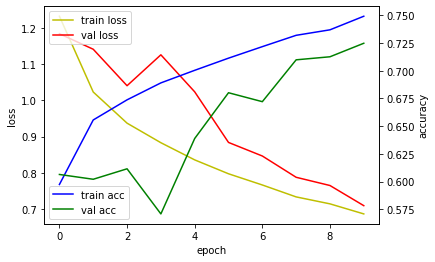

159/159 [==============================] - 0s 2ms/step - loss: 0.7089 - accuracy: 0.7247
##### Test Result #####
loss :  0.7088768482208252
Accuracy :  0.7247345447540283
Epoch 1/10
2348/2348 [==============================] - 8s 3ms/step - loss: 1.1641 - accuracy: 0.6172 - val_loss: 1.0608 - val_accuracy: 0.6095
Epoch 2/10
2348/2348 [==============================] - 7s 3ms/step - loss: 1.0129 - accuracy: 0.6549 - val_loss: 1.0238 - val_accuracy: 0.6504
Epoch 3/10
2348/2348 [==============================] - 7s 3ms/step - loss: 0.9560 - accuracy: 0.6717 - val_loss: 1.0486 - val_accuracy: 0.6260
Epoch 4/10
2348/2348 [==============================] - 7s 3ms/step - loss: 0.9223 - accuracy: 0.6785 - val_loss: 0.9193 - val_accuracy: 0.6736
Epoch 5/10
2348/2348 [==============================] - 8s 3ms/step - loss: 0.8873 - accuracy: 0.6881 - val_loss: 0.9192 - val_accuracy: 0.6695
Epoch 6/10
2348/2348 [==============================] - 7s 3ms/step - loss: 0.8657 - accuracy: 0.6945 - val_l

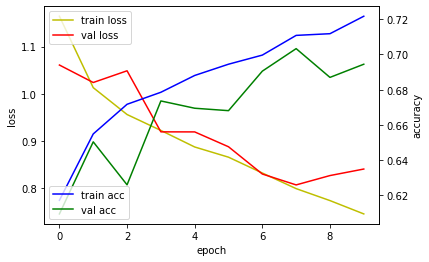

159/159 [==============================] - 0s 2ms/step - loss: 0.8406 - accuracy: 0.6945
##### Test Result #####
loss :  0.8405671715736389
Accuracy :  0.6944553852081299
(18777, 1024)
5
(5086, 1024)
(5086, 5)
Epoch 1/10
2348/2348 [==============================] - 7s 3ms/step - loss: 0.4801 - accuracy: 0.8328 - val_loss: 0.2855 - val_accuracy: 0.8985
Epoch 2/10
2348/2348 [==============================] - 7s 3ms/step - loss: 0.2536 - accuracy: 0.9086 - val_loss: 0.2857 - val_accuracy: 0.8909
Epoch 3/10
2348/2348 [==============================] - 7s 3ms/step - loss: 0.1939 - accuracy: 0.9323 - val_loss: 0.1901 - val_accuracy: 0.9333
Epoch 4/10
2348/2348 [==============================] - 7s 3ms/step - loss: 0.1610 - accuracy: 0.9447 - val_loss: 0.1605 - val_accuracy: 0.9446
Epoch 5/10
2348/2348 [==============================] - 7s 3ms/step - loss: 0.1383 - accuracy: 0.9537 - val_loss: 0.7404 - val_accuracy: 0.8081
Epoch 6/10
2348/2348 [==============================] - 7s 3ms/step - 

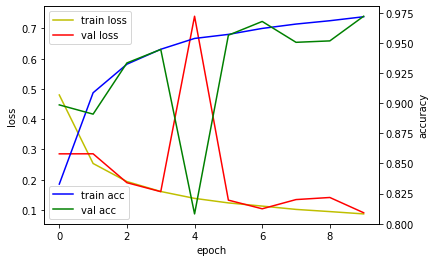

159/159 [==============================] - 0s 2ms/step - loss: 0.0908 - accuracy: 0.9721
##### Test Result #####
loss :  0.09079921990633011
Accuracy :  0.9720802307128906
Epoch 1/10
2348/2348 [==============================] - 8s 3ms/step - loss: 0.3852 - accuracy: 0.8484 - val_loss: 0.2771 - val_accuracy: 0.8893
Epoch 2/10
2348/2348 [==============================] - 8s 3ms/step - loss: 0.2072 - accuracy: 0.9229 - val_loss: 0.3567 - val_accuracy: 0.8881
Epoch 3/10
2348/2348 [==============================] - 8s 3ms/step - loss: 0.1543 - accuracy: 0.9432 - val_loss: 0.0909 - val_accuracy: 0.9715
Epoch 4/10
2348/2348 [==============================] - 8s 3ms/step - loss: 0.1300 - accuracy: 0.9546 - val_loss: 0.2813 - val_accuracy: 0.8997
Epoch 5/10
2348/2348 [==============================] - 8s 3ms/step - loss: 0.1136 - accuracy: 0.9605 - val_loss: 0.1070 - val_accuracy: 0.9646
Epoch 6/10
2348/2348 [==============================] - 7s 3ms/step - loss: 0.1066 - accuracy: 0.9636 - val_

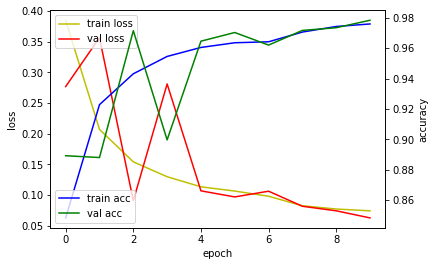

159/159 [==============================] - 0s 2ms/step - loss: 0.0629 - accuracy: 0.9784
##### Test Result #####
loss :  0.06285439431667328
Accuracy :  0.9783719778060913
(18777, 1024)
2
(5086, 1024)
(5086, 2)
Epoch 1/10
2348/2348 [==============================] - 7s 3ms/step - loss: 0.3445 - accuracy: 0.8520 - val_loss: 0.2354 - val_accuracy: 0.9115
Epoch 2/10
2348/2348 [==============================] - 7s 3ms/step - loss: 0.1704 - accuracy: 0.9373 - val_loss: 1.0125 - val_accuracy: 0.6654
Epoch 3/10
2348/2348 [==============================] - 7s 3ms/step - loss: 0.1287 - accuracy: 0.9540 - val_loss: 0.1390 - val_accuracy: 0.9440
Epoch 4/10
2348/2348 [==============================] - 7s 3ms/step - loss: 0.1030 - accuracy: 0.9617 - val_loss: 0.1290 - val_accuracy: 0.9495
Epoch 5/10
2348/2348 [==============================] - 7s 3ms/step - loss: 0.0878 - accuracy: 0.9692 - val_loss: 0.1525 - val_accuracy: 0.9341
Epoch 6/10
2348/2348 [==============================] - 7s 3ms/step -

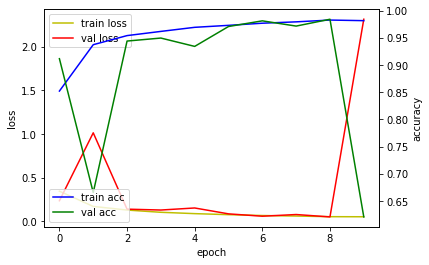

159/159 [==============================] - 0s 2ms/step - loss: 2.3124 - accuracy: 0.6205
##### Test Result #####
loss :  2.3123536109924316
Accuracy :  0.620526909828186
Epoch 1/10
2348/2348 [==============================] - 8s 3ms/step - loss: 0.2504 - accuracy: 0.8957 - val_loss: 0.1313 - val_accuracy: 0.9477
Epoch 2/10
2348/2348 [==============================] - 7s 3ms/step - loss: 0.1358 - accuracy: 0.9459 - val_loss: 0.0978 - val_accuracy: 0.9585
Epoch 3/10
2348/2348 [==============================] - 8s 3ms/step - loss: 0.1164 - accuracy: 0.9566 - val_loss: 0.2946 - val_accuracy: 0.8854
Epoch 4/10
2348/2348 [==============================] - 8s 3ms/step - loss: 0.0881 - accuracy: 0.9649 - val_loss: 0.0572 - val_accuracy: 0.9784
Epoch 5/10
2348/2348 [==============================] - 8s 3ms/step - loss: 0.0827 - accuracy: 0.9685 - val_loss: 0.1141 - val_accuracy: 0.9522
Epoch 6/10
2348/2348 [==============================] - 8s 3ms/step - loss: 0.0712 - accuracy: 0.9734 - val_lo

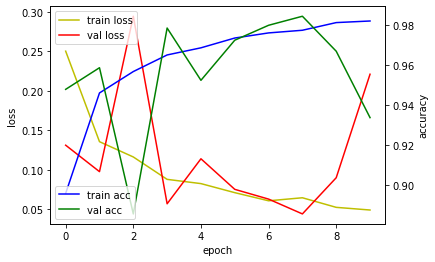

159/159 [==============================] - 0s 2ms/step - loss: 0.2212 - accuracy: 0.9335
##### Test Result #####
loss :  0.22119231522083282
Accuracy :  0.9335430860519409


In [ ]:
# Run code
if __name__=='__main__':
    main()